## Data Splitting and Pre-processing

In [ ]:
img_zip_path = '/content/drive/My Drive/CelebA/Img/img_align_celeba.zip'


In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np

In [ ]:
zip_ref = zipfile.ZipFile(img_zip_path, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
labels_path = '/content/drive/My Drive/CelebA/Anno/list_attr_celeba.txt' 

In [ ]:
labels_df = pd.read_csv(labels_path)

In [ ]:
labels_df.head()

,202599
0,5_o_Clock_Shadow Arched_Eyebrows Attractive Ba...
1,000001.jpg -1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 1...
2,000002.jpg -1 -1 -1 1 -1 -1 -1 1 -1 -1 -1 1...
3,000003.jpg -1 -1 -1 -1 -1 -1 1 -1 -1 -1 1 -1...
4,000004.jpg -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1...


In [ ]:
len(labels_df.columns)

1

In [ ]:
(labels_df['202599'][1]).split()[0]

'000001.jpg'

In [ ]:
len((labels_df['202599'][1]).split()[1:])

40

In [ ]:
len((labels_df['202599'][0]).split()), (labels_df['202599'][0]).split()

(40,
 ['5_o_Clock_Shadow',
  'Arched_Eyebrows',
  'Attractive',
  'Bags_Under_Eyes',
  'Bald',
  'Bangs',
  'Big_Lips',
  'Big_Nose',
  'Black_Hair',
  'Blond_Hair',
  'Blurry',
  'Brown_Hair',
  'Bushy_Eyebrows',
  'Chubby',
  'Double_Chin',
  'Eyeglasses',
  'Goatee',
  'Gray_Hair',
  'Heavy_Makeup',
  'High_Cheekbones',
  'Male',
  'Mouth_Slightly_Open',
  'Mustache',
  'Narrow_Eyes',
  'No_Beard',
  'Oval_Face',
  'Pale_Skin',
  'Pointy_Nose',
  'Receding_Hairline',
  'Rosy_Cheeks',
  'Sideburns',
  'Smiling',
  'Straight_Hair',
  'Wavy_Hair',
  'Wearing_Earrings',
  'Wearing_Hat',
  'Wearing_Lipstick',
  'Wearing_Necklace',
  'Wearing_Necktie',
  'Young'])

In [ ]:
labels_df.tail()

,202599
202595,202595.jpg -1 -1 1 -1 -1 -1 1 -1 -1 1 -1 -1...
202596,202596.jpg -1 -1 -1 -1 -1 1 1 -1 -1 1 -1 -1...
202597,202597.jpg -1 -1 -1 -1 -1 -1 -1 -1 1 -1 -1 -1...
202598,202598.jpg -1 1 1 -1 -1 -1 1 -1 1 -1 -1 -1...
202599,202599.jpg -1 1 1 -1 -1 -1 -1 -1 -1 1 -1 -1...


In [ ]:
label_dict = {}
for i in range(1, len(labels_df)):
    label_dict[labels_df['202599'][i].split()[0]] = [x for x in labels_df['202599'][i].split()[1:]]
    


In [ ]:
len(label_dict)    

202599

In [ ]:
label_df = pd.DataFrame(label_dict).T

In [ ]:
label_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
label_df.columns = (labels_df['202599'][0]).split()

In [ ]:
label_df.replace(['-1'], ['0'], inplace = True)

In [ ]:
label_df.index


Index(['000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg',
       '000006.jpg', '000007.jpg', '000008.jpg', '000009.jpg', '000010.jpg',
       ...
       '202590.jpg', '202591.jpg', '202592.jpg', '202593.jpg', '202594.jpg',
       '202595.jpg', '202596.jpg', '202597.jpg', '202598.jpg', '202599.jpg'],
      dtype='object', length=202599)

In [ ]:
from PIL import Image

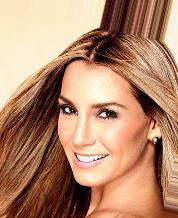

In [ ]:
Image.open('img_align_celeba/000001.jpg')

In [ ]:
from glob import glob

In [ ]:
files = glob('img_align_celeba/*.jpg')

In [ ]:
len(files)

202599

In [ ]:
shuffle = np.random.permutation(len(files))

In [ ]:
len(shuffle)*0.3

60779.7

In [ ]:
max(shuffle)

202598

In [ ]:
for i in ['train', 'valid']:
    os.mkdir(os.path.join('/tmp/', i))

In [ ]:
!ls /tmp/

drivefs_ipc.0  drivefs_ipc.0_shell  tmprsfzvhy3  train	valid


In [ ]:
files[10].split('/')[-1]

'006433.jpg'

In [ ]:
# label_df.find(files[10].split('/')[-1])

In [ ]:
((np.array(label_df[label_df.index==files[10].split('/')[-1]]))).shape

(1, 40)

In [ ]:
from tqdm import tqdm

In [ ]:
valid_dict = {}
valid_file_names = []
for i in tqdm(shuffle[:6000]):
    file_name = files[i].split('/')[-1]
    labels = np.array(label_df[label_df.index==file_name])
    valid_dict[file_name] = labels
    valid_file_names.append(file_name)
    os.rename(files[i], os.path.join('/tmp/', '/tmp/valid', file_name))

100%|██████████| 6000/6000 [01:08<00:00, 87.28it/s]


In [ ]:
len(glob('/tmp/valid/*.jpg'))

6000

In [ ]:
# Image.open('/tmp/valid/000004.jpg')

In [ ]:
# valid_dict.values()

In [ ]:
valid_df = pd.DataFrame(valid_dict.values())

In [ ]:
valid_df.head()

,0
0,"[[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."
3,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,..."


In [ ]:
valid_df.index = valid_file_names

In [ ]:
valid_df.head()

,0
064465.jpg,"[[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,..."
013351.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,..."
000263.jpg,"[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,..."
152775.jpg,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,..."
184761.jpg,"[[0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,..."


In [ ]:
valid_df.columns = ['labels']

In [ ]:
                    # (valid_df.labels[valid_df.index == '130656.jpg'].values.tolist()[0]).astype(float), ((valid_df.labels[valid_df.index == '130656.jpg'].values.tolist()[0]).astype(float)).shape

In [ ]:
train_dict = {}
train_file_names = []
for i in tqdm(shuffle[6000:18000 ]):
    file_name = files[i].split('/')[-1]
    labels = np.array(label_df[label_df.index==file_name])
    train_dict[file_name] = labels
    train_file_names.append(file_name)
    os.rename(files[i], os.path.join('/tmp/', '/tmp/train', file_name))

100%|██████████| 12000/12000 [02:17<00:00, 87.05it/s]


In [ ]:
len(train_dict)

12000

In [ ]:
train_df = pd.DataFrame(train_dict.values())

In [ ]:
train_df.head()

,0
0,"[[0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,..."
1,"[[0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [ ]:
train_df.index = train_file_names

In [ ]:
train_df.columns = ['labels']

# Generating Batches and Training

In [1]:
import torchvision

In [2]:
from glob import glob
import os
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision import models
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch.optim import lr_scheduler
from torch import optim
from torchvision.utils import make_grid
import time
%matplotlib inline

In [3]:
from torch.utils.data import Dataset

In [4]:
# class MultiClassCelebA(Dataset):
    
#     def __init__(self, dataframe, folder_dir, transform = None):
        
#         self.dataframe = dataframe
#         self.folder_dir = folder_dir
#         self.transform = transform
#         self.file_names = dataframe.index
#         self.labels = dataframe.labels.values.tolist()
        
        
#     def __len__(self):
#         return len(self.dataframe)
    
    
#     def __getitem__(self, index):
        
#         image = Image.open(os.path.join(self.folder_dir, self.file_names[index]))
#         label = self.labels[index][0]
#         sample = {'image': image, 'label': label.astype(float)}
#         if self.transform:
#             image = self.transform(sample['image'])
#             sample = {'image': image, 'label': label.astype(float)}
        
#         return sample
        


class MultiClassCelebA(Dataset):
    def __init__(self, label_file, image_dir, transform=None):
        self.image_dir = 'data/'+ image_dir
        self.images = os.listdir(self.image_dir)
        self.transform = transform

    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_name = self.images[idx]  #'%06d'%data_vec[0]+'.jpg'
        path = img_name.replace('.'+img_name.split('.')[-1],'.csv')
        data_vec = pd.read_csv('data/params/'+path)
        data_vec[data_vec>=1] =1
        #.values
        img_path = os.path.join(self.image_dir, img_name)
        image = Image.open(img_path)
        #label = np.array(data_vec[1:]>-1, dtype=int)
        label = np.array(data_vec.values[0],dtype=int)
        label = label.astype('double')
# =============================================================================
#         if len(image.shape)==2:
#             image = np.expand_dims(image,2)
#             image = np.concatenate((image,image,image),axis=2)
# =============================================================================
        if not image.mode=='RGB':
            image.convert('RGB')
        if self.transform:
            image = self.transform(image)
        sample = {'image': image, 'label': label}
        
        return sample
        #return image, label

        

In [5]:
tfms = transforms.Compose([transforms.Resize((256, 256)),
                           transforms.ToTensor()])

In [6]:
train_dl = MultiClassCelebA('', 'train', transform = tfms)

In [7]:
# plt.imshow((train_dl[1]['image']).reshape(3, 256, 256))
import pandas as pd

from PIL import Image
import numpy as np

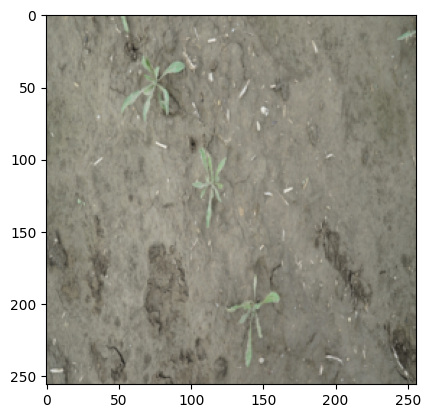

In [8]:
plt.imshow(torchvision.utils.make_grid(train_dl[1]['image']).permute(1, 2, 0))

In [9]:
(train_dl[1]['label'].astype(float))

array([1., 0., 1., 0.])

In [11]:
valid_dl = MultiClassCelebA('', 'val', transform = tfms)

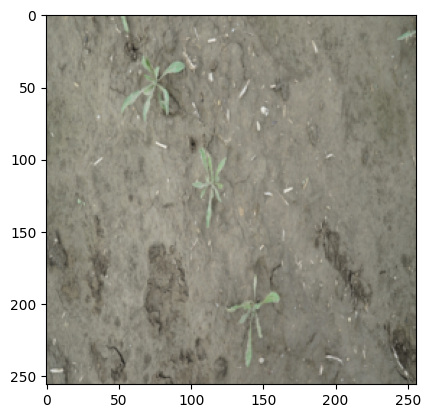

In [12]:
plt.imshow(torchvision.utils.make_grid(valid_dl[1]['image']).permute(1,2,0))

In [13]:
valid_dl[1]['label']

array([1., 0., 1., 0.])

In [14]:
import torch.nn.functional as F

In [15]:
class MultiClassifier(nn.Module):
    def __init__(self):
        super(MultiClassifier, self).__init__()
        self.ConvLayer1 = nn.Sequential(
            nn.Conv2d(3, 64, 3), # 3, 256, 256
            nn.MaxPool2d(2), # op: 16, 127, 127
            nn.ReLU(), # op: 64, 127, 127
        )
        self.ConvLayer2 = nn.Sequential(
            nn.Conv2d(64, 128, 3), # 64, 127, 127   
            nn.MaxPool2d(2), #op: 128, 63, 63
            nn.ReLU() # op: 128, 63, 63
        )
        self.ConvLayer3 = nn.Sequential(
            nn.Conv2d(128, 256, 3), # 128, 63, 63
            nn.MaxPool2d(2), #op: 256, 30, 30
            nn.ReLU() #op: 256, 30, 30
        )
        self.ConvLayer4 = nn.Sequential(
            nn.Conv2d(256, 512, 3), # 256, 30, 30
            nn.MaxPool2d(2), #op: 512, 14, 14
            nn.ReLU(), #op: 512, 14, 14
            nn.Dropout(0.2)
        )
        self.Linear1 = nn.Linear(512 * 14 * 14, 1024)
        self.Linear2 = nn.Linear(1024, 256)
        self.Linear3 = nn.Linear(256, 4)
        
        
    def forward(self, x):
        x = self.ConvLayer1(x)
        x = self.ConvLayer2(x)
        x = self.ConvLayer3(x)
        x = self.ConvLayer4(x)
        x = x.view(x.size(0), -1)
        x = self.Linear1(x)
        x = self.Linear2(x)
        x = self.Linear3(x)
        return F.sigmoid(x)

In [16]:
def check_cuda():
    _cuda = False
    if torch.cuda.is_available():
        _cuda = True
    return _cuda

In [17]:
is_cuda = check_cuda()

In [18]:
model = MultiClassifier()
if is_cuda:
    model.cuda()

In [19]:
train_dataloader = torch.utils.data.DataLoader(train_dl, shuffle = True, batch_size = 64, num_workers = 3)
valid_dataloader = torch.utils.data.DataLoader(valid_dl, shuffle = True, batch_size = 64, num_workers = 3)

In [20]:
def pred_acc(original, predicted):
    return torch.round(predicted).eq(original).sum().numpy()/len(original)

In [21]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)


In [22]:
from pprint import pprint

In [23]:
def fit_model(epochs, model, dataloader, phase = 'training', volatile = False):
    
    pprint("Epoch: {}".format(epochs))

    if phase == 'training':
        model.train()
        
    if phase == 'validataion':
        model.eval()
        volatile = True
        
    running_loss = []
    running_acc = []
    b = 0
    for i, data in enumerate(dataloader):
        

        inputs, target = data['image'].cuda(), data['label'].float().cuda()
        
        inputs, target = Variable(inputs), Variable(target)
        
        if phase == 'training':
            optimizer.zero_grad()
            
        ops = model(inputs)
        
        acc_ = []
        for i, d in enumerate(ops, 0):
           
            acc = pred_acc(torch.Tensor.cpu(target[i]), torch.Tensor.cpu(d))
            acc_.append(acc)

        loss = criterion(ops, target)
                
        running_loss.append(loss.item())
        running_acc.append(np.asarray(acc_).mean())
        b += 1
       
        if phase == 'training':
            
            loss.backward()
        
            optimizer.step()
            
    total_batch_loss = np.asarray(running_loss).mean()
    total_batch_acc = np.asarray(running_acc).mean()
    

    pprint("{} loss is {} ".format(phase,total_batch_loss))
    pprint("{} accuracy is {} ".format(phase, total_batch_acc))
    
    return total_batch_loss, total_batch_acc

In [24]:
from  tqdm import tqdm 

trn_losses = []; trn_acc = []
val_losses = []; val_acc = []
for i in tqdm(range(1, 20)):
    trn_l, trn_a = fit_model(i, model, train_dataloader)
    val_l, val_a = fit_model(i, model, valid_dataloader, phase = 'validation')
    trn_losses.append(trn_l); trn_acc.append(trn_a)
    val_losses.append(val_l); val_acc.append(val_a)

  0%|                                                    | 0/19 [00:00<?, ?it/s]

'Epoch: 1'


/home/mohan/.local/lib/python3.10/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
  0%|                                                    | 0/19 [00:06<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 392.00 MiB (GPU 0; 5.80 GiB total capacity; 4.37 GiB already allocated; 183.38 MiB free; 4.76 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
torch.save(model, "Model_40_total_EPCHS")

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type MultiClassifier. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type MaxPool2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/p